In [53]:
import pandas as pd
#самая популярная библиотека для анализа и обработки данных
import seaborn as sns
#строим красивые графики , с помощью seaborn
ad=pd.read_csv("adult.csv")
#считываем датасет 
ad.info()
#смотрим общую сводку по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [282]:
ad.head()
#можно заметить вопросы в некоторых признаках, от которых следует избавиться

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [54]:
ad["workclass"].describe()
#видим , что чаще других встречается 'Private'
#поэтому было решено заменить '?' на 'Private'

count       48842
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

In [ ]:
ad["workclass"] = ad["workclass"].replace(to_replace=['?'] ,value=["Private"])
#меняем вопросы на Private с помощью метода replace()

In [57]:
ad["occupation"].describe()
#ситуация аналогичная : чаще всего встречается 'Prof-specialty'

count              48842
unique                14
top       Prof-specialty
freq                8981
Name: occupation, dtype: object

In [56]:
ad["occupation"] = ad["occupation"].replace(to_replace=['?'] ,value=["Prof-specialty"])
#поменяли '?' на 'Prof-specialty'

In [58]:
#превратим целевой признак в тип bool
d={">50K":1,"<=50K":0}
#создаем словарь , где key:>50k,value:1 и key:<=50k,value:0
ad = ad.replace({'income': d})
#заменяем по словарю
ad["income"]=ad["income"].astype("int64")
#приводим к типу int64

In [ ]:
#делим категориальные признаки и числовые
#для предварительного анализа
#с помощью метода dtypes библиотеки pandas
ad_obj=ad.dtypes[ad.dtypes == "object"].index
#в ad_obj будут категориальные признаки
ad_int=ad.dtypes[ad.dtypes != "object"].index
#в ad_int будут числовые признаки

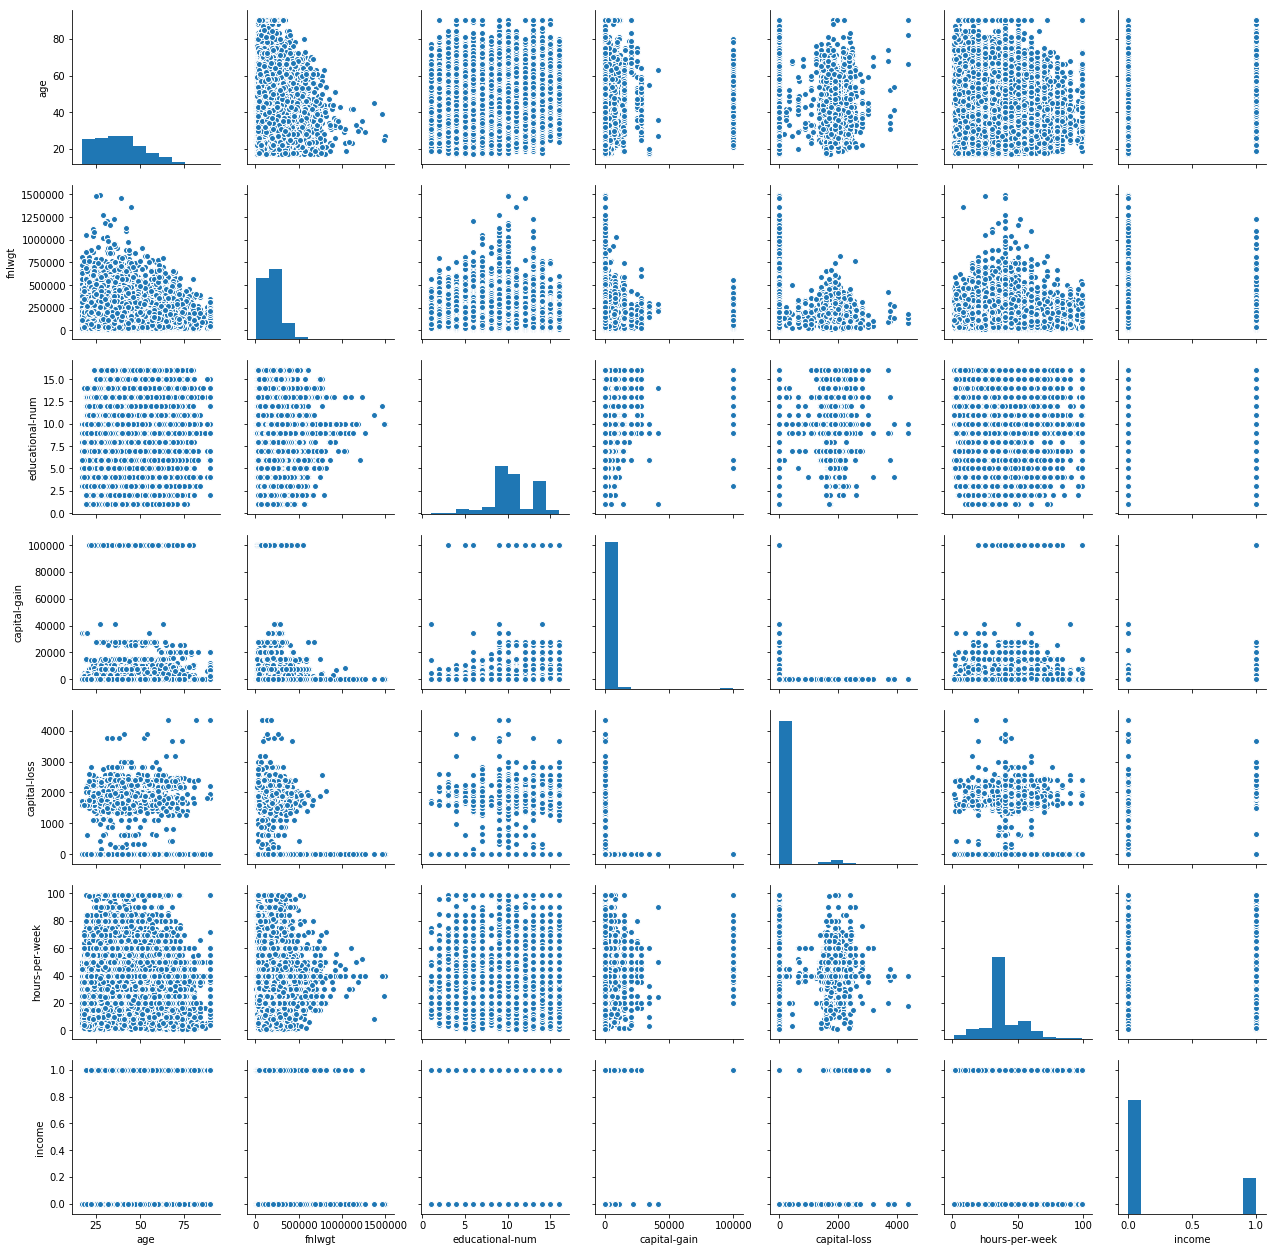

In [26]:
#посмотрим на 'общую картину'
spng=sns.pairplot(ad)
#для этого нам поможет библиотека seaborn с методом pairplot()
spng.savefig("graphs.png")
#сохраняем получившийся график

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

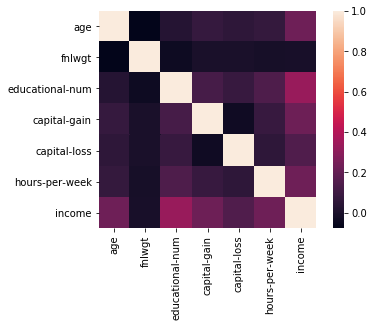

In [297]:
#представим данные в виде тепловой карты
q=sns.heatmap(ad.corr(),square=True)
q.savefig('teplo.png')

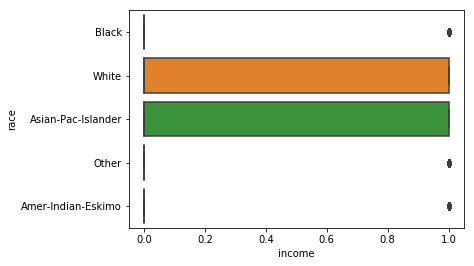

In [283]:
sns.boxplot(x='income', y='race', data=ad)
#построим несколько boxplot для анализа данных

In [130]:
import numpy as np
#импортируем numpy - библиотеку , без которой не обойтись в большинстве ML проектов
#numpy позволяет работать с многомерными массивами,математическими функциями и со многим другим
from sklearn import preprocessing
#библеотека для машинного обучения , в которой реализованы основные алгоритмы ML
le = preprocessing.LabelEncoder()
#преобразование категориальных данных
X=[]
#создаем пустой list
for i in range(0,8):
    X.append(le.fit_transform(ad[ad_obj].iloc[:,[i]]))
    #добавляем в X преобразованные в числа категориальные признаки
x=np.ones((7,48842))
#задаем numpy матрицу с размерностью 7x48842 
#где 7-количество чилсенных признаков и 48842-количество экземпляров
for i in range(0,7):
    x[i]=np.array(ad[ad_int].iloc[:,[i]]).T
    #заполним матрицу элементами , которые явно были типа int64
    #транспонируем матрицу
Y=np.array(x[6])
#создадим вектор Y из целевых признаков
X_obj=np.array(X)
#приведем list(X) к numpy array 
X_int=np.array(x[:6])
#скопируем до целевого признака
X1=np.hstack((X_obj.T,X_int.T))
#транспанируем получившиеся матрицы 
#склеиваем их
X1.shape
#проверяем , что с размерностью все в порядке

/home/sergey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(48842, 14)

In [295]:
%%time
#засекаем время
from sklearn import ensemble , cross_validation, metrics,tree,manifold,linear_model,model_selection, ensemble
#импортируем ныжные нам классы
tree_clf=ensemble.RandomForestClassifier(n_estimators=500,max_depth=20)
#создаем модель случайного леса,экспериментурем с гиперпараметрами
print(cross_validation.cross_val_score(tree_clf, X1, Y,scoring = 'roc_auc', cv = 10).mean())
#оцениваем кросс-валидацией с разбитием на 10 фолдов (classic)

0.9179391215638276
CPU times: user 3min 25s, sys: 0 ns, total: 3min 25s
Wall time: 3min 26s


In [296]:
%%time
import xgboost as xgb
#применим алгоритм бустинга , в этом нам поможет xgboost
estimator = xgb.XGBClassifier(learning_rate=0.01, max_depth=10, n_estimators=10, min_child_weight=4)
#градиентный бустинг , также играемся с гиперпараметрами
print(cross_validation.cross_val_score(estimator, X1, Y,scoring = 'roc_auc', cv = 10).mean())
#посмотрим , что получилось

0.9081802404674949
CPU times: user 7.43 s, sys: 0 ns, total: 7.43 s
Wall time: 7.43 s


In [285]:
%%time
log_clf=linear_model.LogisticRegression()
#вероятнее всего логистическая регрессия покажет себя не с лучшей стороны , но попробовать стоит
print(cross_validation.cross_val_score(log_clf, X1, Y,scoring = 'roc_auc', cv = 10).mean())
#выведем точность , используя для проверки CV

0.7217638925842145
CPU times: user 9.01 s, sys: 0 ns, total: 9.01 s
Wall time: 9.21 s


In [288]:
#для работы с нейросетью мы решили воспользоваться библиотекой keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
#данных не так много да и компьютер слабый , но на всякий случай импортируем дропаут
model = Sequential()
#создаем глубокую нейронную сеть
model.add(Dense(256, activation='relu', input_dim=14))
#добавляем слой с функцией активации relu , input_dim приравниаем 14 (14 признаков)
model.add(Dense(64,activation="softmax"))
#добавляем слой с функцией активации softmax
model.add(Dense(128,activation="relu"))
#добавляем слой с функцией активации relu
model.add(Dense(256,activation="relu"))
#добавляем слой с функцией активации relu
model.add(Dense(128,activation="relu"))
#добавляем слой с функцией активации relu
model.add(Dense(64,activation="relu"))
#добавляем слой с функцией активации relu
model.add(Dense(1, activation='sigmoid')) 
#добавляем крайний слой с функцией активации sigmoid для определения вероятностей
 

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
#настраиваем модель
 
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X1, Y, test_size=0.25, random_state=42)
#делим датасет на две части :75% для обучения , 25% для проверки
model.fit(X_train, Y_train, epochs = 9, batch_size=14)
#собираем модель для обучения , ставим количество эпох на 15
 
scores = model.evaluate(X_test, Y_test)
#получаем реазультаты

Epoch 1/9
36631/36631 [==============================] - 16s 449us/step - loss: 0.5517 - acc: 0.7617
Epoch 2/9
36631/36631 [==============================] - 14s 373us/step - loss: 0.5511 - acc: 0.7609
Epoch 3/9
36631/36631 [==============================] - 14s 379us/step - loss: 0.5506 - acc: 0.7609
Epoch 4/9
36631/36631 [==============================] - 15s 413us/step - loss: 0.5501 - acc: 0.7609
Epoch 5/9
36631/36631 [==============================] - 14s 374us/step - loss: 0.5500 - acc: 0.7609
Epoch 6/9
36631/36631 [==============================] - 16s 438us/step - loss: 0.5500 - acc: 0.7609
Epoch 7/9
36631/36631 [==============================] - 16s 443us/step - loss: 0.5498 - acc: 0.7609
Epoch 8/9
36631/36631 [==============================] - 15s 407us/step - loss: 0.5499 - acc: 0.7609
Epoch 9/9
12211/12211 [==============================] - 3s 222us/step

acc: 76.82%


In [289]:
scores

[0.5409495513012169, 0.7681598559115913]

In [160]:
#посмотрим на модель , которая победила
estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=100, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [292]:
%%time
from sklearn.metrics import accuracy_score
#импортируем метрику
estimator.fit(X_train,Y_train)
y_pred = estimator.predict(X_test)
accuracy = accuracy_score(Y_test, np.round(y_pred))
print("Точность: %.2f%%" % (accuracy * 100.0))
#финальный ответ

Точность: 86.85%
CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.2 s


/home/sergey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
